In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import spacy
import demoji
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
import numpy as np
import contractions
import unicodedata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical,pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,SpatialDropout1D,Dense,Bidirectional,Dropout
from sklearn.preprocessing import LabelEncoder



nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
sw = set(stopwords.words("english"))


df = pd.read_csv("C:/nlp_projects/covidtweets/vaccination_all_tweets.csv",delimiter=',')
df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [2]:
df = df[['text']]
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [3]:
def clean_text(text):

    text = text.lower()


    text = re.sub(r'<.*?>', '', text)


    text = contractions.fix(text)

    text = re.sub(r'https?://\S+|www\.\S+', '', text)


    text = re.sub(r'@\w+|#\w+', '', text)


    text = demoji.replace(text, '')

    text = unicodedata.normalize("NFKD", text)


    text = re.sub(r'[^a-zA-Z\s]', '', text)


    tokens = word_tokenize(text)
    
    
    tokens = [word for word in tokens if word not in sw]

    text = " ".join(tokens).strip()

    return text




def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stem_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stem_tokens)



df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].apply(stem_text)
df['text'].head(10)

0      folk said daikon past could treat cytokin storm
1    world wrong side histori year hope biggest vac...
2                       russian vaccin creat last year
3    fact immut senat even ethic sturdi enough ackn...
4                                  explain need vaccin
5    anyon use adviceguid whether covid vaccin safe...
6    bit sad claim fame success patriot competit us...
7                             mani bright day best win
8                                     covid vaccin get
9                           state start get monday say
Name: text, dtype: object

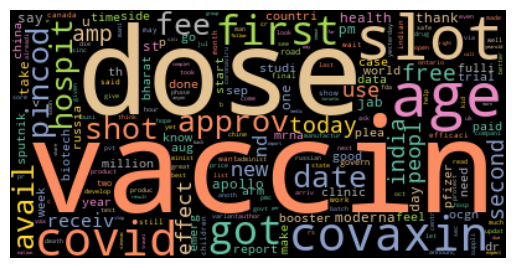

In [4]:
sample_txt=  " ".join(i for i in df['text'])


wc = WordCloud(colormap="Set2",collocations=False).generate(sample_txt)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
most_common_words = nltk.FreqDist(TextBlob(sample_txt).words).most_common(50)
print(f"Top 50 Most Common Words: {most_common_words}")

Top 50 Most Common Words: [('vaccin', 71911), ('dose', 60454), ('slot', 34621), ('age', 34061), ('covaxin', 17728), ('covid', 17302), ('get', 14958), ('got', 12968), ('first', 12828), ('approv', 12759), ('pincod', 12360), ('date', 12204), ('hospit', 11897), ('fee', 11509), ('shot', 11507), ('avail', 10726), ('today', 9460), ('amp', 9457), ('free', 9031), ('india', 8626), ('second', 8432), ('effect', 7616), ('use', 7364), ('peopl', 7307), ('receiv', 7286), ('nd', 7286), ('moderna', 6969), ('day', 6697), ('st', 6125), ('pm', 6003), ('thank', 5885), ('us', 5878), ('one', 5785), ('jab', 5384), ('apollo', 5318), ('take', 5282), ('say', 5180), ('health', 5087), ('like', 4919), ('done', 4528), ('clinic', 4509), ('new', 4455), ('paid', 4425), ('go', 4373), ('report', 4296), ('million', 4251), ('need', 4225), ('good', 4195), ('case', 4139), ('countri', 4131)]


In [6]:
nlp = spacy.load("en_core_web_sm")



doc = nlp(sample_txt[:2000])



for token in doc:
    print(token.text,token.pos,token.dep_)


for ent in doc.ents:
    print(ent.text, "|",spacy.explain(ent.label_))

folk 92 nsubj
said 100 ROOT
daikon 96 compound
past 92 nsubj
could 87 aux
treat 100 ccomp
cytokin 92 compound
storm 92 compound
world 92 nmod
wrong 84 amod
side 92 compound
histori 84 amod
year 92 compound
hope 92 dobj
biggest 84 advcl
vaccin 84 amod
effort 92 dobj
ev 85 prep
russian 84 pobj
vaccin 100 amod
creat 92 dobj
last 84 amod
year 92 compound
fact 92 compound
immut 96 compound
senat 92 nsubj
even 86 advmod
ethic 84 amod
sturdi 96 nmod
enough 84 amod
acknowledg 92 appos
born 100 acl
explain 100 conj
need 92 dobj
vaccin 100 prep
anyon 92 nsubj
use 100 ccomp
adviceguid 92 dobj
whether 98 mark
covid 84 amod
vaccin 100 dep
safe 84 amod
whilst 98 prep
breastfeed 92 pobj
bit 92 npadvmod
sad 84 amod
claim 92 compound
fame 92 compound
success 92 compound
patriot 96 nmod
competit 96 compound
usa 96 compound
canada 96 compound
uk 96 compound
mani 96 npadvmod
bright 84 amod
day 92 npadvmod
best 84 advmod
win 92 dep
covid 100 amod
vaccin 92 dobj
get 100 dep
state 92 compound
start 92 dobj
g

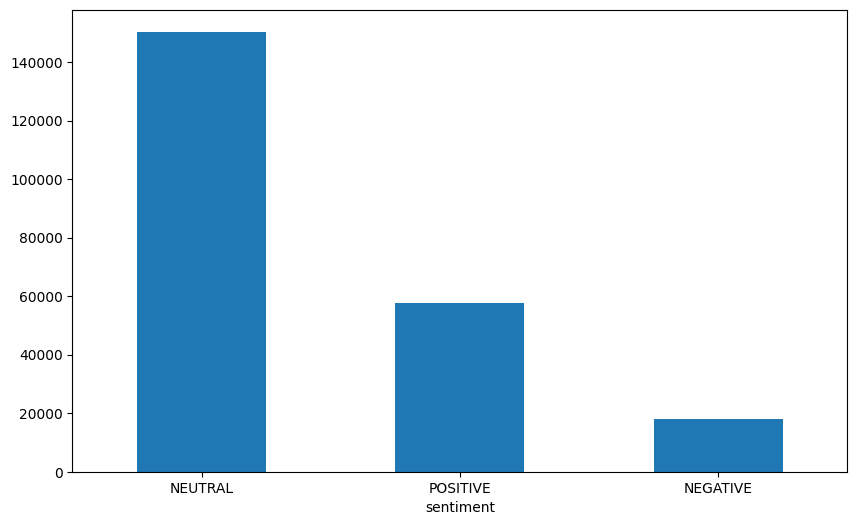

length of word index: 
38316


In [7]:

def polarity(text):
    return TextBlob(text).polarity

df['polarity'] = df['text'].apply(polarity)


def sentiment(label):
    if label == 0:
        return "NEUTRAL"
    elif label < 0:
        return "NEGATIVE"
    elif label > 0:
        return "POSITIVE"



df['sentiment'] = df['polarity'].apply(sentiment)


plt.figure(figsize=(10,6))
df['sentiment'].value_counts().plot(kind='bar',rot=0)
plt.show()



le = LabelEncoder()




X = df['text']
y = df['sentiment']
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print("length of word index: ")
print(len(word_index))

In [8]:

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)




max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)



y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding="post")




RNN = Sequential()
RNN.add(Embedding(len(word_index)+1,output_dim=20,input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(10,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(20,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='softmax'))
RNN.summary()


RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.1)
pred = RNN.predict(X_test)
loss,acc = RNN.evaluate(X_test,y_test)
print(f"Testing Loss: {loss*100:.2f}%")
print(f"Testing accuracy: {acc*100:.2f}%")


Max Length of Sequences:  25


C:\Users\katsa\miniconda3\envs\cuda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - accuracy: 0.8481 - loss: 0.4020 - val_accuracy: 0.9875 - val_loss: 0.0466
Epoch 2/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.9870 - loss: 0.0514 - val_accuracy: 0.9925 - val_loss: 0.0247
Epoch 3/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.9925 - loss: 0.0261 - val_accuracy: 0.9930 - val_loss: 0.0243
Epoch 4/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.9952 - loss: 0.0168 - val_accuracy: 0.9931 - val_loss: 0.0242
Epoch 5/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.9948 - val_loss: 0.0204
Epoch 6/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9951 - val_loss: 0.0209
Epoch 7/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9969 - loss: 0.0121 - val_accuracy: 0.9950 - val_loss: 0.0211
Epoch 8/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9970 -

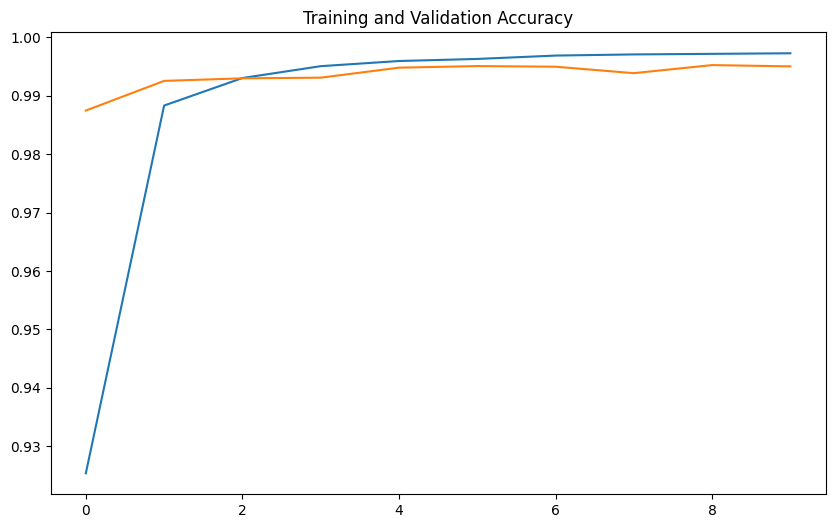

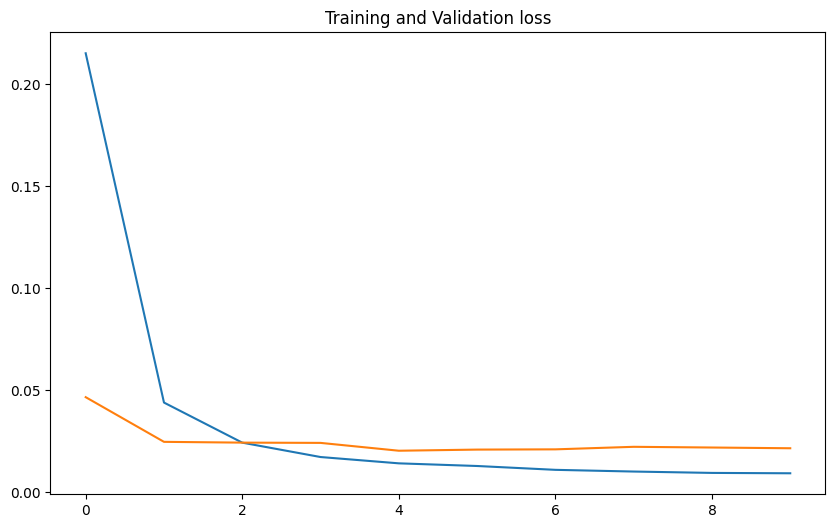

In [9]:

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and Validation loss")
plt.show()


F1 Score from LSTM: 99.56%
accuracy: 99.56


<Axes: >

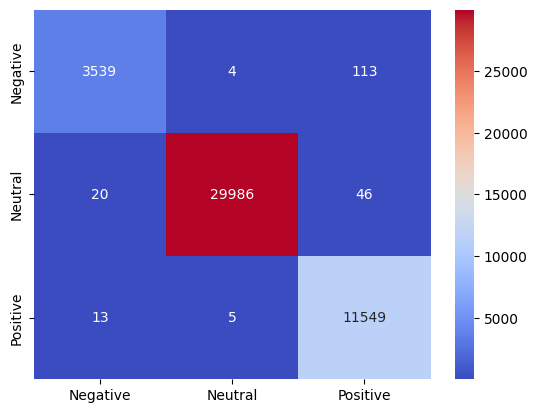

In [10]:

y_true = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)



f1 = f1_score(y_true, y_pred,average="weighted")
print(f'F1 Score from LSTM: {f1*100:.2f}%')

acc = accuracy_score(y_true, y_pred)
print(f'accuracy: {acc*100:.2f}')


def plot_cofusison_matrix(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return sns.heatmap(conf_matrix,fmt='d',annot=True,cmap='coolwarm',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])


plot_cofusison_matrix(y_true, y_pred)